In [4]:
pip install numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 181.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 530.4 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install pandas seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [52]:
data = pd.read_csv('/Users/macbookproci9/Documents/HousePricePredection/HousePrices.csv')

In [53]:
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [55]:
data.shape

(29451, 12)

In [56]:
data.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [57]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [58]:
data.describe(include = 'object')

,POSTED_BY,BHK_OR_RK,ADDRESS
count,29451,29451,29451
unique,3,2,6899
top,Dealer,BHK,"Zirakpur,Chandigarh"
freq,18291,29427,509


In [59]:
numerical_columns = data.select_dtypes(include=['number'])

numerical_columns.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [60]:
# Generate summary statistics and check for missing values


missing_values = data.isnull().sum()
missing_values

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

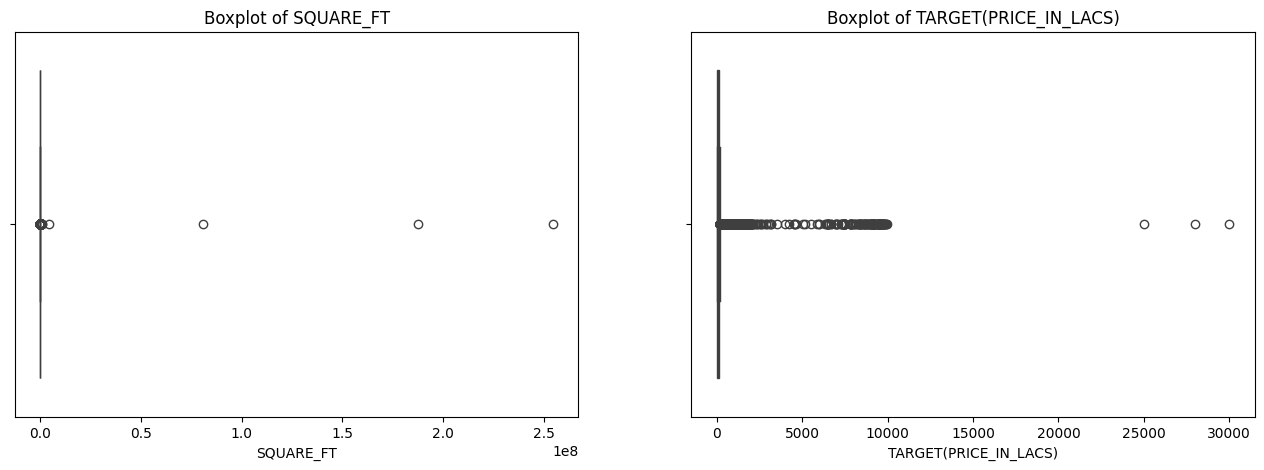

In [64]:
# Set up the visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Boxplot for SQUARE_FT to visualize outliers
sns.boxplot(x=data['SQUARE_FT'], ax=axes[0])
axes[0].set_title('Boxplot of SQUARE_FT')

# Boxplot for TARGET(PRICE_IN_LACS) to visualize outliers
sns.boxplot(x=data['TARGET(PRICE_IN_LACS)'], ax=axes[1])
axes[1].set_title('Boxplot of TARGET(PRICE_IN_LACS)')

plt.show()

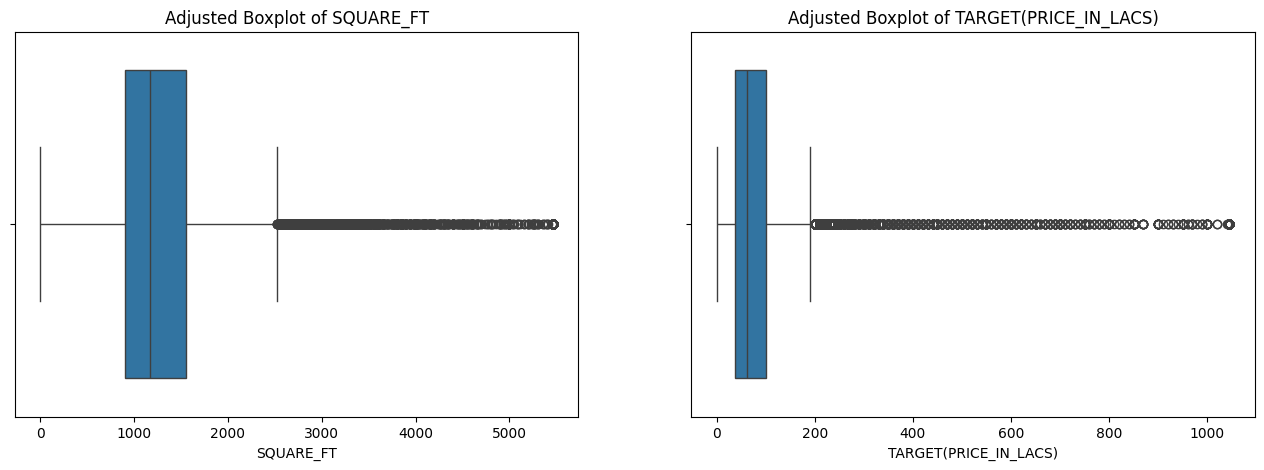

In [67]:
# Calculate the 99th percentile for SQUARE_FT and TARGET(PRICE_IN_LACS)
percentile_99_square_ft = data['SQUARE_FT'].quantile(0.99)
percentile_99_price = data['TARGET(PRICE_IN_LACS)'].quantile(0.99)

# Cap values at the 99th percentile
data['SQUARE_FT'] = data['SQUARE_FT'].clip(upper=percentile_99_square_ft)
data['TARGET(PRICE_IN_LACS)'] = data['TARGET(PRICE_IN_LACS)'].clip(upper=percentile_99_price)

# Visualize the adjustments
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Adjusted boxplot for SQUARE_FT
sns.boxplot(x=data['SQUARE_FT'], ax=axes[0])
axes[0].set_title('Adjusted Boxplot of SQUARE_FT')

# Adjusted boxplot for TARGET(PRICE_IN_LACS)
sns.boxplot(x=data['TARGET(PRICE_IN_LACS)'], ax=axes[1])
axes[1].set_title('Adjusted Boxplot of TARGET(PRICE_IN_LACS)')

plt.show()


In [69]:
# Examine unique values in categorical columns
unique_values_categorical = {column: data[column].unique() for column in data.select_dtypes(include=['object']).columns}

unique_values_categorical

{'POSTED_BY': array(['Owner', 'Dealer', 'Builder'], dtype=object),
 'BHK_OR_RK': array(['BHK', 'RK'], dtype=object),
 'ADDRESS': array(['Ksfc Layout,Bangalore', 'Vishweshwara Nagar,Mysore',
        'Jigani,Bangalore', ..., 'west mambalam,Chennai',
        'Gandhi Nagar,Gulbarga', 'E3-108, Lake View Recidency,,Vapi'],
       dtype=object)}

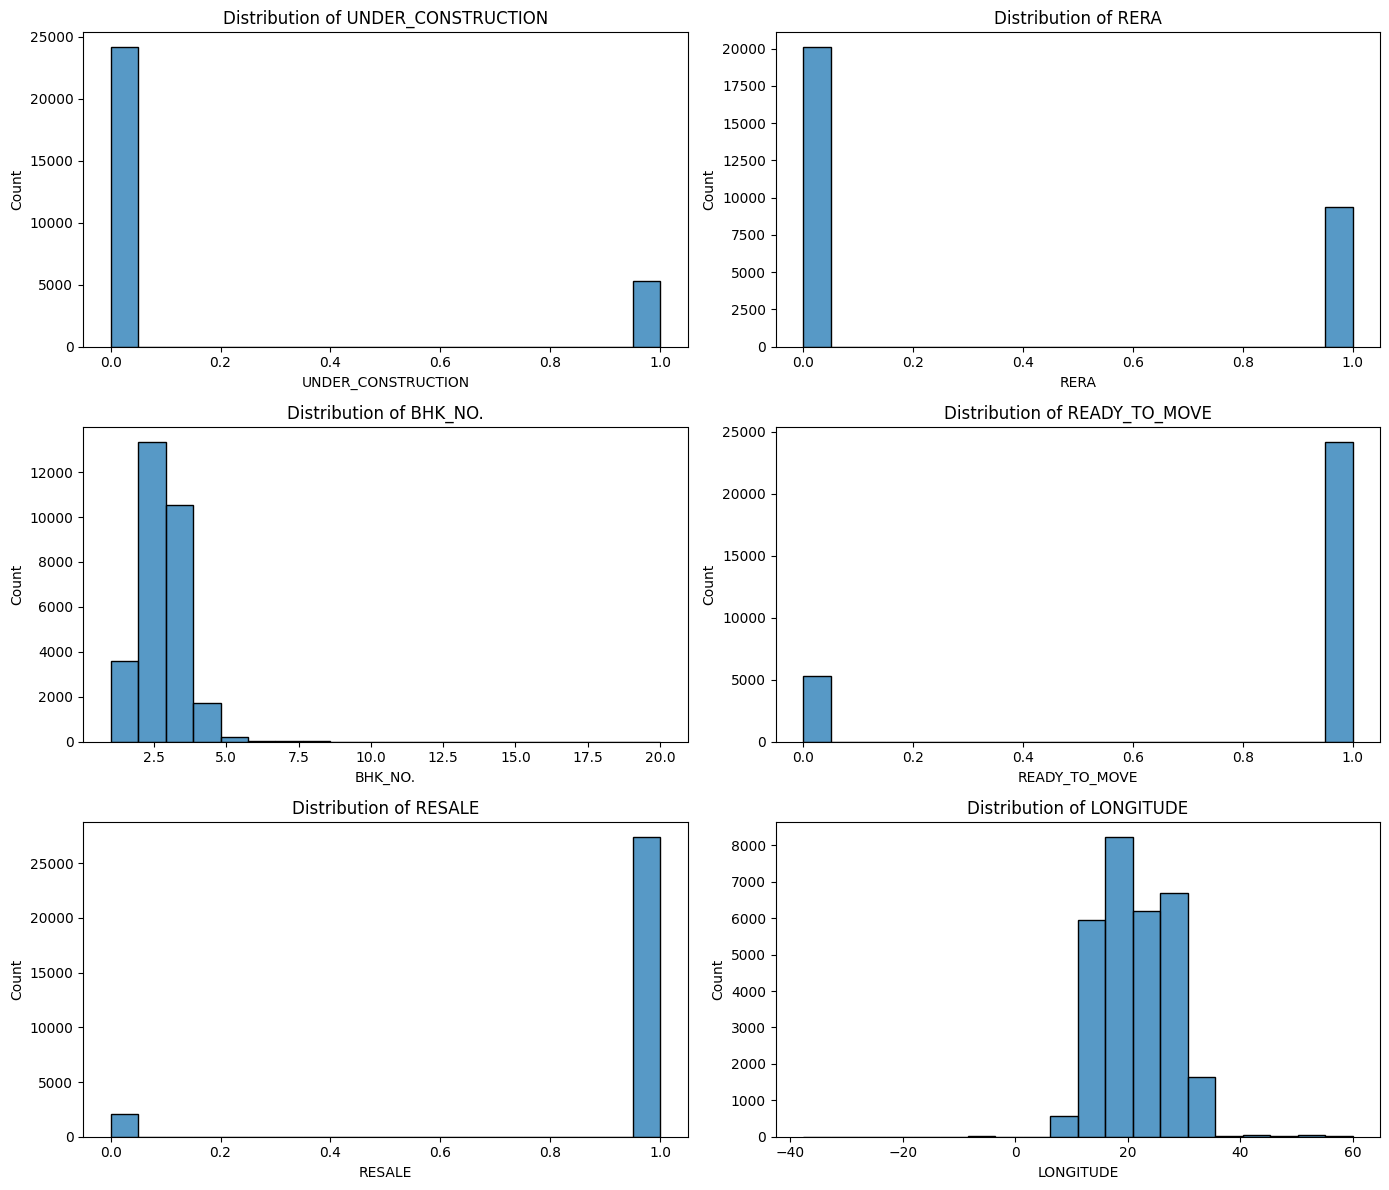

In [70]:
# Setting up the visualization for remaining numeric columns
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
columns_to_plot = ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE']

for col, ax in zip(columns_to_plot, axes.flatten()):
    sns.histplot(data[col], bins=20, ax=ax, kde=False)
    ax.set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

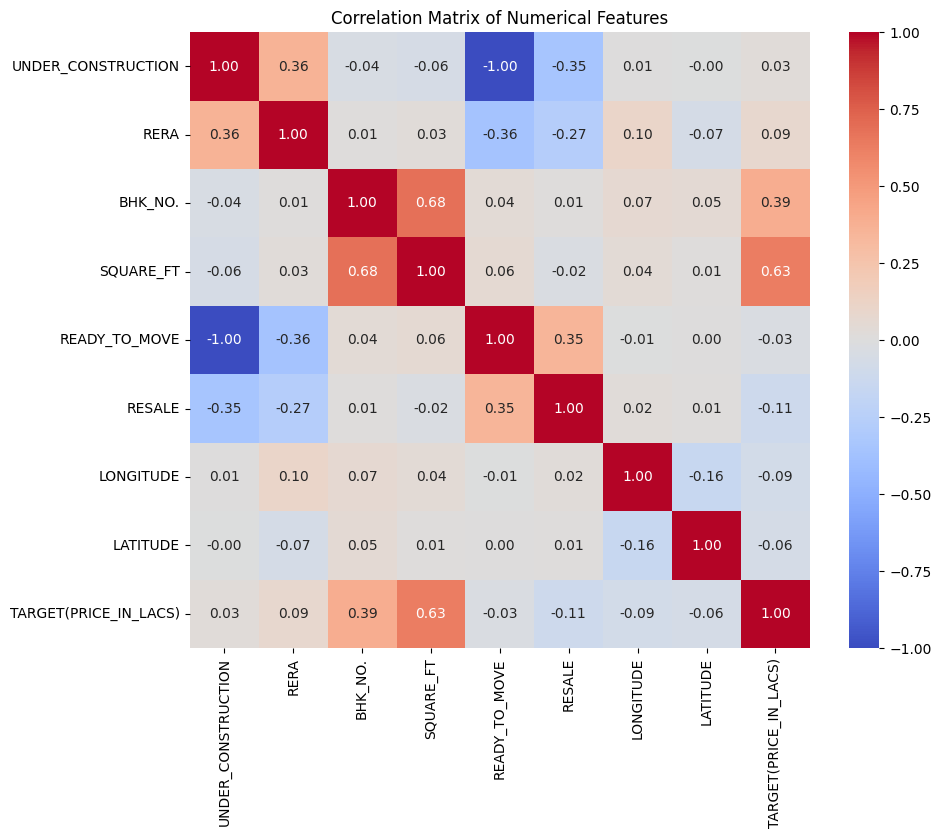

In [73]:
# Compute the correlation matrix for numerical features only
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


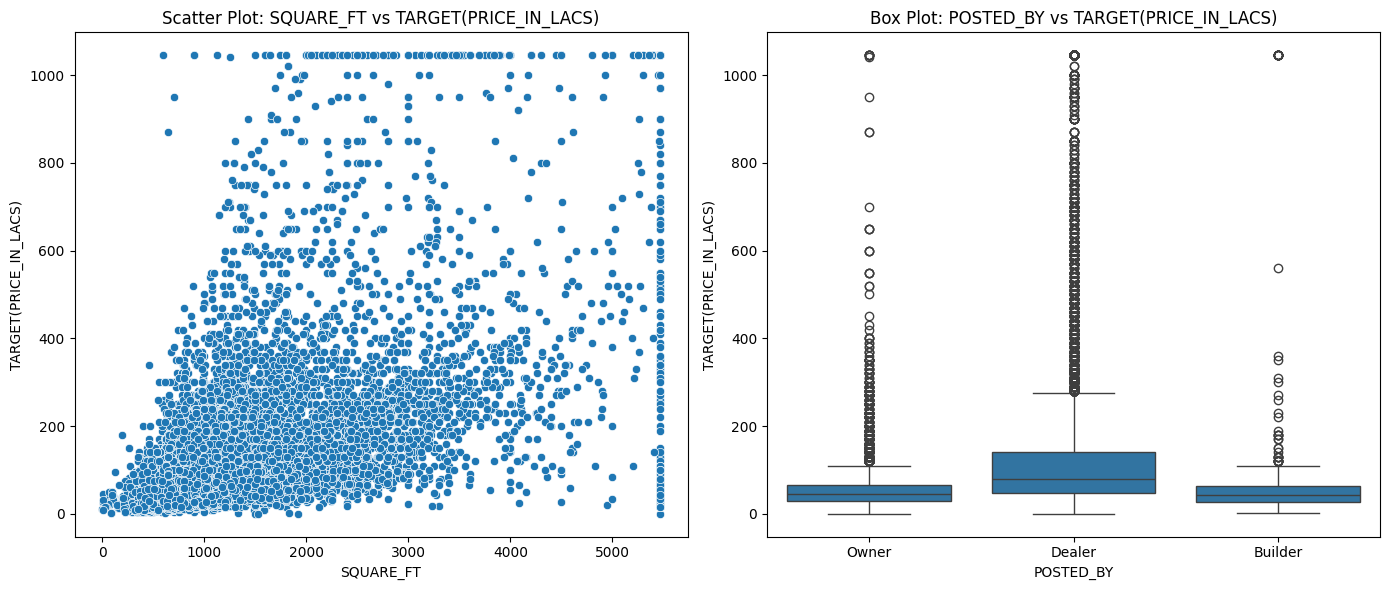

In [74]:
# Setting up the visualizations for continuous and categorical variables
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for SQUARE_FT vs TARGET(PRICE_IN_LACS)
sns.scatterplot(x='SQUARE_FT', y='TARGET(PRICE_IN_LACS)', data=data, ax=axes[0])
axes[0].set_title('Scatter Plot: SQUARE_FT vs TARGET(PRICE_IN_LACS)')

# Box plot for POSTED_BY vs TARGET(PRICE_IN_LACS)
sns.boxplot(x='POSTED_BY', y='TARGET(PRICE_IN_LACS)', data=data, ax=axes[1])
axes[1].set_title('Box Plot: POSTED_BY vs TARGET(PRICE_IN_LACS)')

plt.tight_layout()
plt.show()


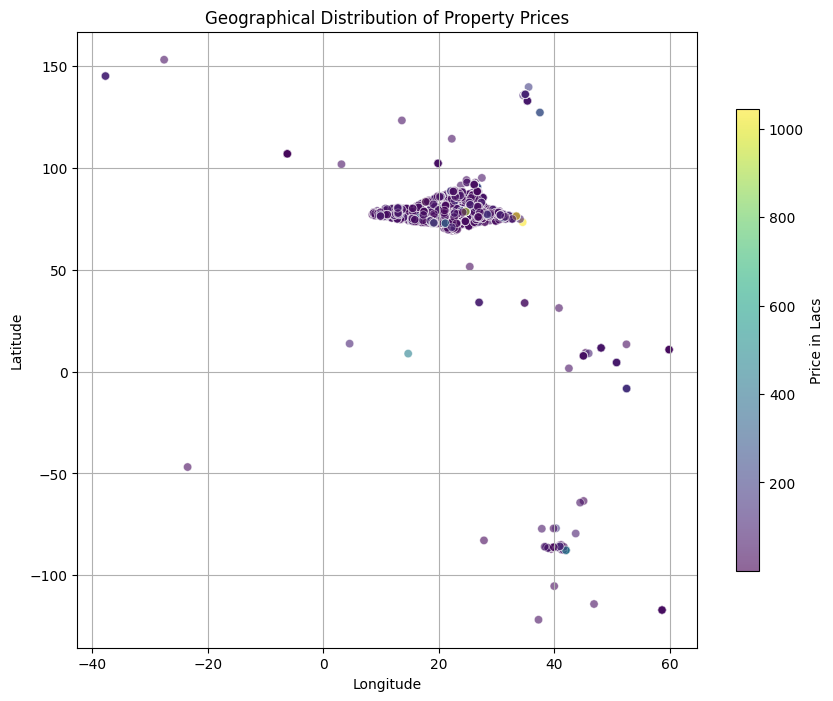

In [75]:
import matplotlib.colors as mcolors

# Define the color map for the plot based on the price
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=data['TARGET(PRICE_IN_LACS)'].min(), vmax=data['TARGET(PRICE_IN_LACS)'].max())

fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(data['LONGITUDE'], data['LATITUDE'], c=data['TARGET(PRICE_IN_LACS)'],
                     cmap=cmap, norm=norm, alpha=0.6, edgecolors='w', linewidth=0.5)

# Add a color bar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.75)
cbar.set_label('Price in Lacs')

ax.set_title('Geographical Distribution of Property Prices')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.grid(True)
plt.show()

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [77]:
# Selecting features and target variable
features = data.drop('TARGET(PRICE_IN_LACS)', axis=1)
target = data['TARGET(PRICE_IN_LACS)']

In [78]:
# Categorical and numeric features for transformation
categorical_features = ['POSTED_BY', 'BHK_OR_RK']
numeric_features = ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE']


In [79]:
# Creating a Column Transformer to apply transformations to the respective feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Creating a pipeline with preprocessing and the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [80]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['UNDER_CONSTRUCTION', 'RERA',
                                                   'BHK_NO.', 'SQUARE_FT',
                                                   'READY_TO_MOVE', 'RESALE',
                                                   'LONGITUDE', 'LATITUDE']),
                                                 ('cat', OneHotEncoder(),
                                                  ['POSTED_BY',
                                                   'BHK_OR_RK'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [91]:
# Check data types of all columns
print(data.dtypes)

# Identify categorical columns that might still need encoding
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns needing encoding:", categorical_cols)



UNDER_CONSTRUCTION      int64
RERA                    int64
BHK_NO.                 int64
SQUARE_FT             float64
READY_TO_MOVE           int64
                       ...   
CITY_Vizianagaram        bool
CITY_Warangal            bool
CITY_Wardha              bool
CITY_Washim              bool
CITY_Yavatmal            bool
Length: 271, dtype: object
Categorical columns needing encoding: Index(['ADDRESS'], dtype='object')


In [94]:
X_train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,...,CITY_Vellore,CITY_Vidisha,CITY_Vijayawada,CITY_Visakhapatnam,CITY_Visnagar,CITY_Vizianagaram,CITY_Warangal,CITY_Wardha,CITY_Washim,CITY_Yavatmal
20898,1,0,2,709.113608,0,1,22.486964,88.313191,False,True,...,False,False,False,False,False,False,False,False,False,False
28923,0,0,3,1800.370665,1,1,27.400000,82.960000,False,False,...,False,False,False,False,False,False,False,False,False,False
12216,1,1,6,3280.182232,0,1,24.690280,78.418890,False,True,...,False,False,False,False,False,False,False,False,False,False
6216,0,0,3,2573.588548,1,1,28.522931,77.357078,False,True,...,False,False,False,False,False,False,False,False,False,False
22404,0,0,2,900.109770,1,1,23.166495,72.634290,False,False,...,False,False,False,False,False,False,False,False,False,False


In [96]:
y_train.head()

20898     28.4
28923     68.0
12216    360.0
6216     160.0
22404     41.0
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [81]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(3569.273226100644, 0.8125665125921645)

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'house_prices' is your DataFrame and pre-processing is complete
features = data.drop(['TARGET(PRICE_IN_LACS)', 'ADDRESS'], axis=1)  # Exclude 'ADDRESS' if it's not dropped yet
target = data['TARGET(PRICE_IN_LACS)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees and other parameters
rf_model.fit(X_train, y_train)

# Predicting the target values using the test set
y_pred_rf = rf_model.predict(X_test)

# Calculating MSE and R-squared for evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor MSE:", mse_rf)
print("Random Forest Regressor R²:", r2_rf)


Random Forest Regressor MSE: 3516.6592434364807
Random Forest Regressor R²: 0.8153294342382423


In [100]:

# Assuming y_test contains the actual values and y_pred_rf contains the predicted values from the Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Mean Squared Error for Random Forest Model:", mse_rf)


Mean Squared Error for Random Forest Model: 3516.6592434364807


In [101]:
# Predicting the target values using the test set
y_pred_rf = rf_model.predict(X_test)


In [102]:
y_pred_rf


array([ 49.238     , 186.277     ,  38.064     , ...,  64.541     ,
       151.52857143,  31.418     ])

In [103]:


# Assuming y_test contains the actual values and y_pred_rf contains the predicted values from your Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Mean Absolute Error for Random Forest Model:", mae_rf)


Mean Absolute Error for Random Forest Model: 23.683303260590574


In [111]:
# Creating the Lasso Regression model
lasso_model = Lasso(alpha=0.1, random_state=42)  # alpha is the regularization strength
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=42)

In [112]:
# Predicting the target values using the test set
y_pred_lasso = lasso_model.predict(X_test)

In [113]:
# Calculating MSE and R-squared for evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("LASSO Model MSE:", mse_lasso)
print("LASSO Model R²:", r2_lasso)

LASSO Model MSE: 7915.671960144403
LASSO Model R²: 0.584323780590159


In [114]:
# Assuming y_test contains the actual values and y_pred_lasso contains the predicted values from the LASSO model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Mean Absolute Error for LASSO Model:", mae_lasso)

Mean Absolute Error for LASSO Model: 48.831003499213516


In [116]:
# Assuming y_test contains the actual values and y_pred_lasso contains the predicted values from the LASSO model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Mean Squared Error for LASSO Model:", mse_lasso)

Mean Squared Error for LASSO Model: 7915.671960144403


In [119]:
# Calculate Mean Squared Error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Calculate Mean Absolute Error
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

# Calculate R-squared Score
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the scores
print("Mean Squared Error (MSE) for LASSO Model:", mse_lasso)
print("Mean Absolute Error (MAE) for LASSO Model:", mae_lasso)
print("R-squared Score (R²) for LASSO Model:", r2_lasso)

Mean Squared Error (MSE) for LASSO Model: 7915.671960144403
Mean Absolute Error (MAE) for LASSO Model: 48.831003499213516
R-squared Score (R²) for LASSO Model: 0.584323780590159


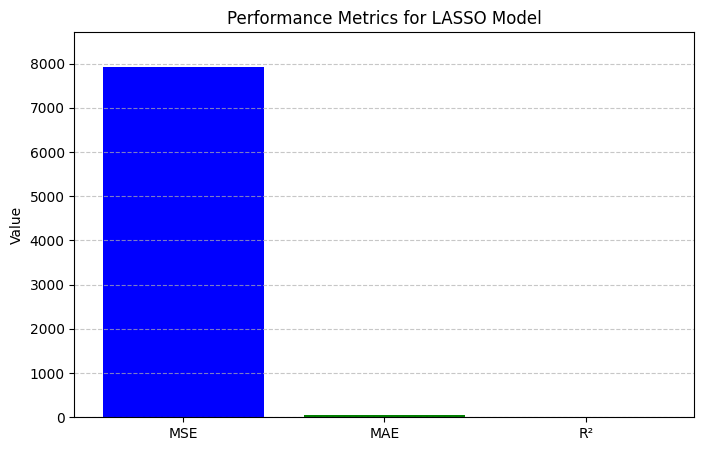

In [120]:
# Scores to plot
metrics = ['MSE', 'MAE', 'R²']
values = [mse_lasso, mae_lasso, r2_lasso]

# Create bar chart
plt.figure(figsize=(8, 5))  # Set the figure size
plt.bar(metrics, values, color=['blue', 'green', 'red'])  # Plot bars with different colors

# Adding title and labels
plt.title('Performance Metrics for LASSO Model')
plt.ylabel('Value')
plt.ylim(0, max(values) + 0.1 * max(values))  # Set y-axis limits to add some space

# Show grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.show()